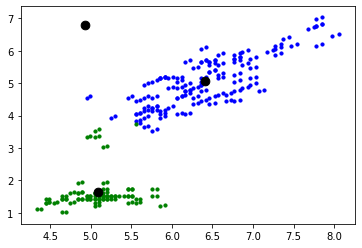

In [29]:
#CMP3751M Machine Learning Assignment 1
#Gabriella Di Gregorio 15624188
#Task 2.2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#Reads in the data using pandas.read_csv because pandas.DataFrame.from_csv is outdated and discouraged.
dataset = pd.read_csv('CMP3751M_CMP9772M_ML_Assignment 1_Task2 - dataset - dog breeds.csv')

#Function to calculate Euclidean Distance, taking two features
#Renamed from compute_euclidean_distance(vec_1, vec_2)
def Euclidean_distance(feat_one, feat_two):

    #Initialises the Squared Distance to 0
    squared_distance = 0

    #Goes through each value in the first feature, and assumes the second is the same length
    for i in range(len(feat_one)):

            #for each value in the first feature, subtract the value of the second feature from the first, and square the answer
            #each result is added as a running total to the Squared Distance
            squared_distance += (feat_one[i] - feat_two[i])**2

    #To calculate the Euclidean Distance, Square Root the Squared Distance (uses the math library)
    ed = math.sqrt(squared_distance)

    return ed;

#A function to randomly choose values for k amount of centroids, using the values from the dataset
def initialise_centroids(dataset, k):
    #Uses the built-in numpy random to randomly choose centroid values between the lowest and highest value in the dataset, 
    #for k amount of centroids, across 4 features/columns.
    return np.random.uniform(dataset.min(), dataset.max(), size=(k,4))

#numpy.random.uniform: Draw samples from a uniform distribution. 
#Samples are uniformly distributed over the half-open interval [low, high) (includes low, but excludes high).
#Any value within the given interval is equally likely to be drawn by uniform. (Docs.scipy.org, 2018)

#Function to calculate the Kmeans, taking the data and k amount of centroids
def kmeans(dataset, k):        
    #initialises centroids by calling the function to randomly assign them
    centroids = initialise_centroids(dataset, k)
    
    #initialises an empty array to store which cluster each piece of data is assigned to
    cluster_assigned = []
    
    #Creates an array with the same size as the centroids that can be used to detect whether the values have changed
    #numpy.empty_like: Return a new array with the same shape and type as a given array. (Docs.scipy.org, 2019)
    change = np.empty_like(centroids)
    
    while True:
        #Checks to see if the values of the centroids have changed, and stops the operation if not because this would mean a division by 0
        #numpy.allclose: Returns True if two arrays are element-wise equal within a tolerance. (Docs.scipy.org, 2019)
        if np.allclose(change, centroids) == True:
            break
        
        #assigns the values of the centroids to the change array so they are remembered and can be checked
        change = centroids
        
        #goes through each value in each row of the data
        for index, rows in dataset.iterrows():
            
            #initialises an empty array to store the Euclidean distances between each datapoint and the centroids
            distances = []
            
            #for the number of centroids (k), add the result of the calculation of euclidean distance function between the values in the rows and the centroids
            for i in range(k):
                distances.append(Euclidean_distance(rows, centroids[i]))
                
            #The following if statements are used to calculate the smallest distance value, depending on how many centroids there are. 
            #The smallest of each is appended to the cluster assigned.
            #If there are only two centroids, then only two distance values need to be compared
            if k == 2:
                if distances[0] < distances[1]:
                    cluster_assigned.append(0)
                else:
                    cluster_assigned.append(1)
            #however, if there are three centroids, three values must be compared
            #if the first distance result is smaller than both the second and third, that can be appended,
            #if not, the second and third must be compared then the smallest of the two can be assigned to the cluster
            if k == 3:
                if distances[0] < distances[1] and distances[2]:
                    cluster_assigned.append(0)
                elif distances[1] < distances[2]:
                    cluster_assigned.append(1)
                else:
                    cluster_assigned.append(2)

        #initialises an empty array to store the new centroids, after the means have been calculated
        newcentroids = []
        
        #for all centroids, initialise the four features and a counter to 0
        for i in range(k):
            height, tail_length, leg_length, nose_circ, ctr = 0,0,0,0,0
            #For each row in the dataset, add up all of the first values in each row to the height (because this is a column), 
            #and all of the second values in each row to the tail_length, and so on
            for index, rows in dataset.iterrows():
                if cluster_assigned[index] == i:
                    height+= rows[0]
                    tail_length+= rows[1]
                    leg_length+= rows[2]
                    nose_circ+= rows[3]
                    ctr+=1
                    
            #if the counter is 0, use the old centroids to avoid a divide by 0 error
            if ctr == 0:
                newcentroids.append(centroids[i])
            else:
                #otherwise, append the means of each columns to the new centroid values
                newcentroids.append([height/ctr, tail_length/ctr, leg_length/ctr, nose_circ/ctr])
        centroids = newcentroids
                                        
    return centroids, cluster_assigned

#K is the number of centroids, k = 2 is for two centroids, k = 3 is for three centroids
k = 3

#assigns the results of the kmeans function to 'cen' for centroids and 'clust' for cluster assigned
cen, clust = kmeans(dataset, k)
#makes each cluster represented by a different colour, red, blue, and green, so they are clear on a graph
colour = ['r', 'b', 'g']

#for each centroid, go through each row and plot the first [0] and second [1] (or third [2] and fourth [3]) with a size/scale of 10 and the assigned colour
for i in range(k):
    for index, row in dataset.iterrows():
        if clust[index] == i:
            plt.scatter(row[0],row[2], s=10, c=colour[i])

#Makes the centroids a dataframe
#pandas.DataFrame: Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). 
#arithmetic operations align on both row and column labels. (Pandas.pydata.org, n.d.)
cen = pd.DataFrame(cen)
#plot the centroid points on a scattergraph, using a size/scale of 75 and the colour black.
plt.scatter(cen.values[:,0], cen.values[:,2], s=75, c='black')
#[:,0] for example means [first_row:last_row,column_0]. 
#For a 2-dimensional list/matrix/array, this notation gives all the values in column 0 (from all rows). (Stack Overflow, 2016)
#Displays the graph
plt.show()